# Issues with Data
- Users have different preferences and no one is doing the fact check.
- LMSYS does not allow to undo or redo annotations.

# Possible biases
- Positional Bias: Users might favor the first answer they see. (No significant bias was observed.)
- Length Bias: There could be a preference for longer answers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")

In [2]:
df_train = pd.read_csv("/kaggle/input/lmsys-chatbot-arena/train.csv")
df_test = pd.read_csv("/kaggle/input/lmsys-chatbot-arena/test.csv")

In [3]:
print(df_train.shape)
print(df_test.shape)

(57477, 9)
(3, 4)


In [4]:
df_train.head(3)

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1


In [5]:
df_test.head(3)

,id,prompt,response_a,response_b
0,136060,"[""I have three oranges today, I ate an orange ...","[""You have two oranges today.""]","[""You still have three oranges. Eating an oran..."
1,211333,"[""You are a mediator in a heated political deb...","[""Thank you for sharing the details of the sit...","[""Mr Reddy and Ms Blue both have valid points ..."
2,1233961,"[""How to initialize the classification head wh...","[""When you want to initialize the classificati...","[""To initialize the classification head when p..."


# Check duplicates

In [6]:
df_train[['id']].nunique()

id    57477
dtype: int64

In [7]:
# since id is unique, drop it and check duplicates
df_train = df_train.drop('id', axis=1)

print(len(df_train[df_train.duplicated()]), " duplicated rows")

df_train[df_train.duplicated(keep=False)].sort_values(by=['prompt'])

7  duplicated rows


,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
1777,llama-2-13b-chat,llama-2-70b-chat,"[""Answer the following statements with \""Agree...","[""Sure, here are my answers to your questions:...","[""Sure, here are my answers:\n\n1. Disagree\n2...",0,0,1
33946,llama-2-13b-chat,llama-2-70b-chat,"[""Answer the following statements with \""Agree...","[""Sure, here are my answers to your questions:...","[""Sure, here are my answers:\n\n1. Disagree\n2...",0,0,1
9775,gemini-pro,gpt-3.5-turbo-0613,"[""Let's do a basedline test. You will be asked...","[""Ready."",""Cells.""]","[""Ready."",""Cope.""]",0,1,0
34086,gemini-pro,gpt-3.5-turbo-0613,"[""Let's do a basedline test. You will be asked...","[""Ready."",""Cells.""]","[""Ready."",""Cope.""]",0,1,0
11125,gpt-4-1106-preview,claude-2.0,"[""Respond only with the letter of the correct ...","[""B: The bricks""]","[""C""]",1,0,0
52738,gpt-4-1106-preview,claude-2.0,"[""Respond only with the letter of the correct ...","[""B: The bricks""]","[""C""]",1,0,0
14051,gpt-4-0613,gpt-3.5-turbo-0613,"[""Sarah (female) has three brothers, her broth...","[""Sarah has two sisters.""]","[""Sarah has one sister.""]",0,1,0
57464,gpt-4-0613,gpt-3.5-turbo-0613,"[""Sarah (female) has three brothers, her broth...","[""Sarah has two sisters.""]","[""Sarah has one sister.""]",0,1,0
6452,pplx-70b-online,gpt-3.5-turbo-0613,"[""What is faster: a car that can travel at 20k...","[""Bicycle""]","[""Tie""]",0,1,0
54570,pplx-70b-online,gpt-3.5-turbo-0613,"[""What is faster: a car that can travel at 20k...","[""Bicycle""]","[""Tie""]",0,1,0


# Text data preprocessing

In [8]:
print(df_test['prompt'][0])
print(type(df_test['prompt'][0]))

["I have three oranges today, I ate an orange yesterday. How many oranges do I have?"]
<class 'str'>


In [9]:
# prompt, response_a and response_b type = <class 'str'>, wrapped in List

def process_text(input_str):
    stripped_str = input_str.strip('[]')
#     print(len(stripped_str.split('","')))
#     if len(stripped_str.split('","')) >1:
#         print("stripped_str")
#         print(stripped_str)
#         print("-"*50)
#         for s in stripped_str.split('","'):
#             print(s)
#             print(s.strip('"'))
#             print()
    sentences = [s.strip('"') for s in stripped_str.split('","')]
    return  ' '.join(sentences)

In [10]:
df_train.loc[:, 'prompt'] = df_train['prompt'].apply(process_text)
df_train.loc[:, 'response_a'] = df_train['response_a'].apply(process_text)
df_train.loc[:, 'response_b'] = df_train['response_b'].apply(process_text)

In [11]:
data = df_train.iloc[0]
print("prompt:")
print(data['prompt'])
print("\nresponse_a:")
print(data['response_a'])
print("\nresponse_b:")
print(data['response_b'])

prompt:
Is it morally right to try to have a certain percentage of females on managerial positions? OK, does pineapple belong on a pizza? Relax and give me fun answer.

response_a:
The question of whether it is morally right to aim for a certain percentage of females in managerial positions is a complex ethical issue that involves considerations of fairness, equality, diversity, and discrimination.\n\nHere are some arguments in favor of and against such policies:\n\n**Arguments in favor:**\n\n1. **Correcting Historical Inequities:** Women have historically been underrepresented in leadership roles due to various cultural, institutional, and social barriers. Aiming for a specific percentage can be seen as a corrective measure to address past and ongoing discrimination.\n\n2. **Promoting Diversity:** Diverse leadership teams can enhance decision-making and represent a broader range of perspectives. This can lead to better outcomes for organizations and society as a whole.\n\n3. **Equalit

# model_a and model_b

In [12]:
null_model_a = df_train['model_a'].isna().sum()
null_model_b = df_train['model_b'].isna().sum()
print("Null model_a count: ", null_model_a)
print("Null model_b count: ", null_model_b)

Null model_a count:  0
Null model_b count:  0


In [13]:
df_train["model_a"].value_counts()

model_a
gpt-4-1106-preview          3678
gpt-3.5-turbo-0613          3553
gpt-4-0613                  3099
claude-2.1                  2859
gpt-4-0314                  2087
                            ... 
falcon-180b-chat             145
openchat-3.5-0106            108
qwen1.5-7b-chat              106
qwen1.5-4b-chat              100
mistral-7b-instruct-v0.2      54
Name: count, Length: 64, dtype: int64

In [14]:
df_train["model_b"].value_counts()

model_b
gpt-4-1106-preview          3709
gpt-3.5-turbo-0613          3530
gpt-4-0613                  3066
claude-2.1                  2724
claude-instant-1            2051
                            ... 
falcon-180b-chat             141
openchat-3.5-0106            136
qwen1.5-7b-chat              102
qwen1.5-4b-chat              100
mistral-7b-instruct-v0.2      46
Name: count, Length: 64, dtype: int64

In [15]:
def plot_pie(df, column_name, threshold=0.02):
    value_counts = df[column_name].value_counts()
    total_count = len(df)
    frequency = value_counts / total_count

    minority_index = frequency[frequency < threshold].index
    df_combined = df[column_name].replace(minority_index, 'Other')
    
    # count again
    combined_value_counts = df_combined.value_counts()
    percentages = (combined_value_counts / combined_value_counts.sum() * 100).round(1)
    
    legend_labels = [f'{label}: {count} ({percentage}%)' for label, count, percentage in zip(combined_value_counts.index, combined_value_counts, percentages)]

    plt.figure(figsize=(6, 4))
    wedges, texts = plt.pie(combined_value_counts, startangle=140)

    # Add a legend with labels and percentages
    plt.legend(wedges, legend_labels, title=column_name, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title('Unique counts of {}'.format(column_name))
    plt.show()

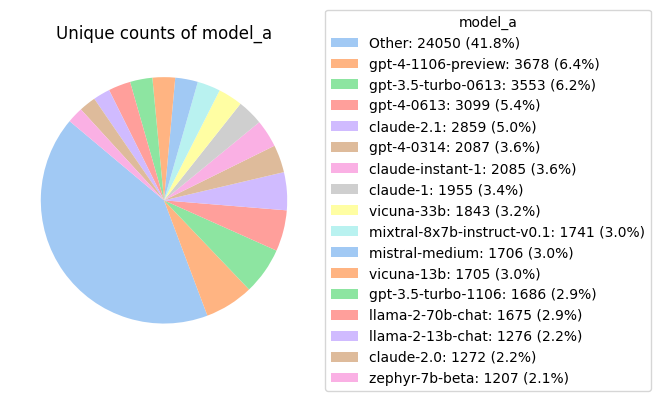

In [16]:
plot_pie(df_train, 'model_a')

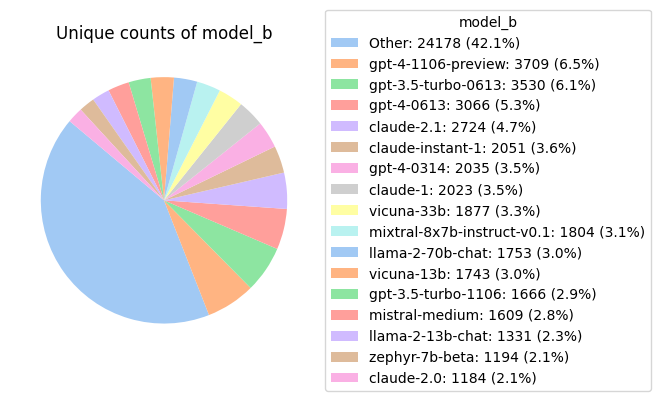

In [17]:
plot_pie(df_train, 'model_b')

## Positional biases

**Assumption** 
- Users might favor the first answer they see. They may always choose the leftmost or rightmost answer.

**Result**
- Shows similar patterns regardless of position (model_a or model_B)

In [18]:
cond = ((df_train['winner_model_a']+df_train['winner_model_b']+df_train['winner_tie'])>1) \
        | ((df_train['winner_model_a']+df_train['winner_model_b']+df_train['winner_tie'])==0)
df_train[cond]

,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie


In [19]:
winner=[]
for idx, row in df_train.iterrows():
    if row['winner_model_a']==1:
        winner.append('winner_model_a')
    elif row['winner_model_b']==1:
        winner.append('winner_model_b')
    else:
        winner.append('winner_tie')
        
df_train['winner'] = winner
df_train.head(3)

,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner
0,gpt-4-1106-preview,gpt-4-0613,Is it morally right to try to have a certain p...,The question of whether it is morally right to...,"As an AI, I don't have personal beliefs or opi...",1,0,0,winner_model_a
1,koala-13b,gpt-4-0613,What is the difference between marriage licens...,A marriage license is a legal document that al...,A marriage license and a marriage certificate ...,0,1,0,winner_model_b
2,gpt-3.5-turbo-0613,mistral-medium,explain function calling. how would you call a...,Function calling is the process of invoking or...,Function calling is the process of invoking a ...,0,0,1,winner_tie


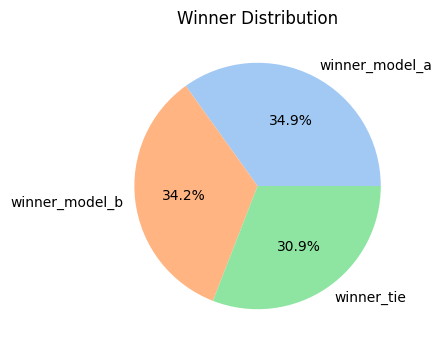

In [20]:
value_counts = df_train['winner'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Winner Distribution')
plt.show()

### visualize the number of wins/loses/ties for each model when it's in the model_a or  model_b position. 

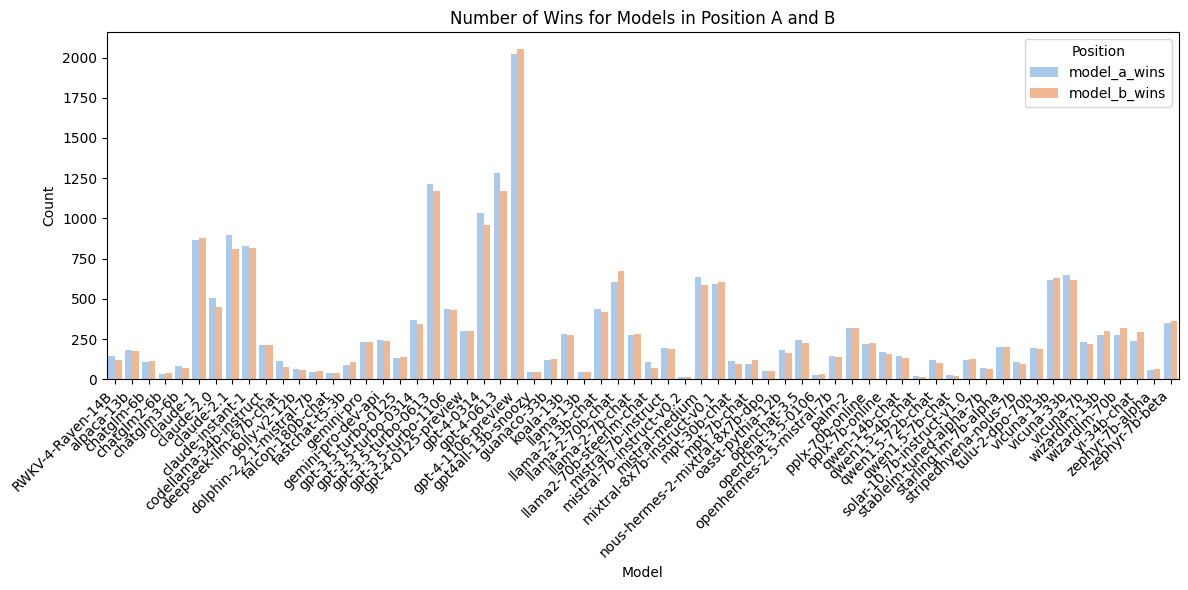

In [21]:
#### win
# model_a loses if the winner is winner_model_a
# model_b loses if the winner is winner_model_b

# count the number of wins for model_a and model_b
model_a_wins = df_train[df_train['winner'] == 'winner_model_a'].groupby('model_a').size().reset_index(name='count')
model_b_wins = df_train[df_train['winner'] == 'winner_model_b'].groupby('model_b').size().reset_index(name='count')

# rename and merge to a new df
model_a_wins.rename(columns={'model_a': 'model', 'count': 'model_a_wins'}, inplace=True)
model_b_wins.rename(columns={'model_b': 'model', 'count': 'model_b_wins'}, inplace=True)
merged_wins = pd.merge(model_a_wins, model_b_wins, on='model', how='outer').fillna(0)

# melt the dataframe for easier plotting
melted_wins = pd.melt(merged_wins, id_vars=['model'], value_vars=['model_a_wins', 'model_b_wins'], 
                      var_name='Position', value_name='Count')

# plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_wins, x='model', y='Count', hue='Position')

plt.title('Number of Wins for Models in Position A and B')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Position')
plt.tight_layout()
plt.show()


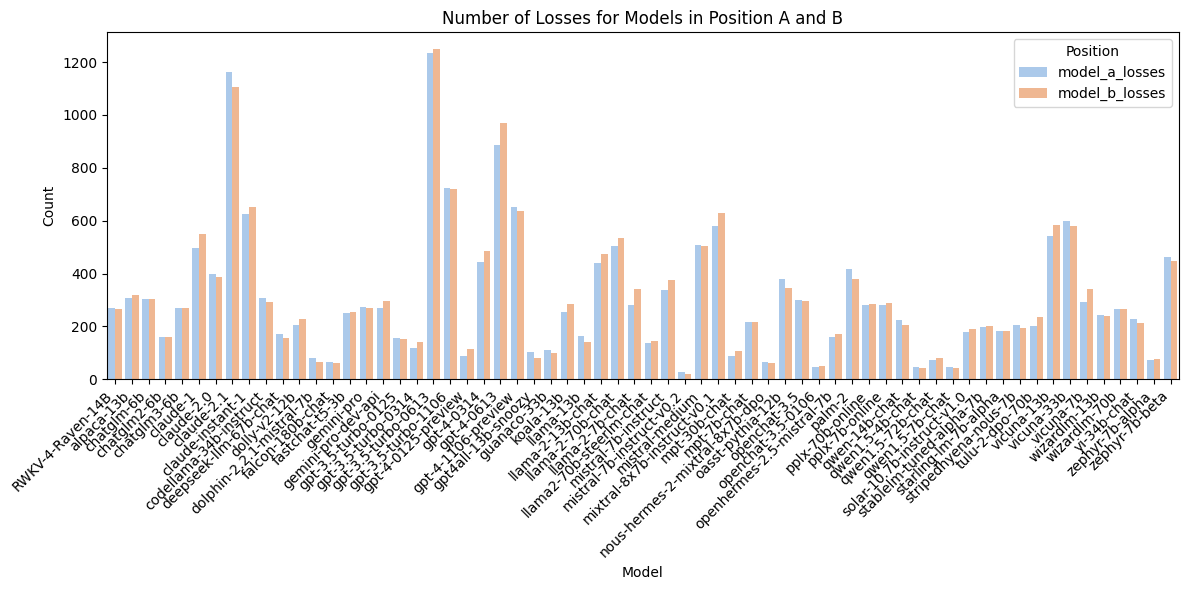

In [22]:
#### lose
# model_a loses if the winner is winner_model_b
# model_b loses if the winner is winner_model_a


# count the number of lose for model_a and model_b
model_a_losses = df_train[df_train['winner'] == 'winner_model_b'].groupby('model_a').size().reset_index(name='count')
model_b_losses = df_train[df_train['winner'] == 'winner_model_a'].groupby('model_b').size().reset_index(name='count')

# rename and merge to a new df
model_a_losses.rename(columns={'model_a': 'model', 'count': 'model_a_losses'}, inplace=True)
model_b_losses.rename(columns={'model_b': 'model', 'count': 'model_b_losses'}, inplace=True)
merged_losses = pd.merge(model_a_losses, model_b_losses, on='model', how='outer').fillna(0)

# melt the dataframe for easier plotting
melted_losses = pd.melt(merged_losses, id_vars=['model'], value_vars=['model_a_losses', 'model_b_losses'], 
                        var_name='Position', value_name='Count')

# plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_losses, x='model', y='Count', hue='Position')
plt.title('Number of Losses for Models in Position A and B')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

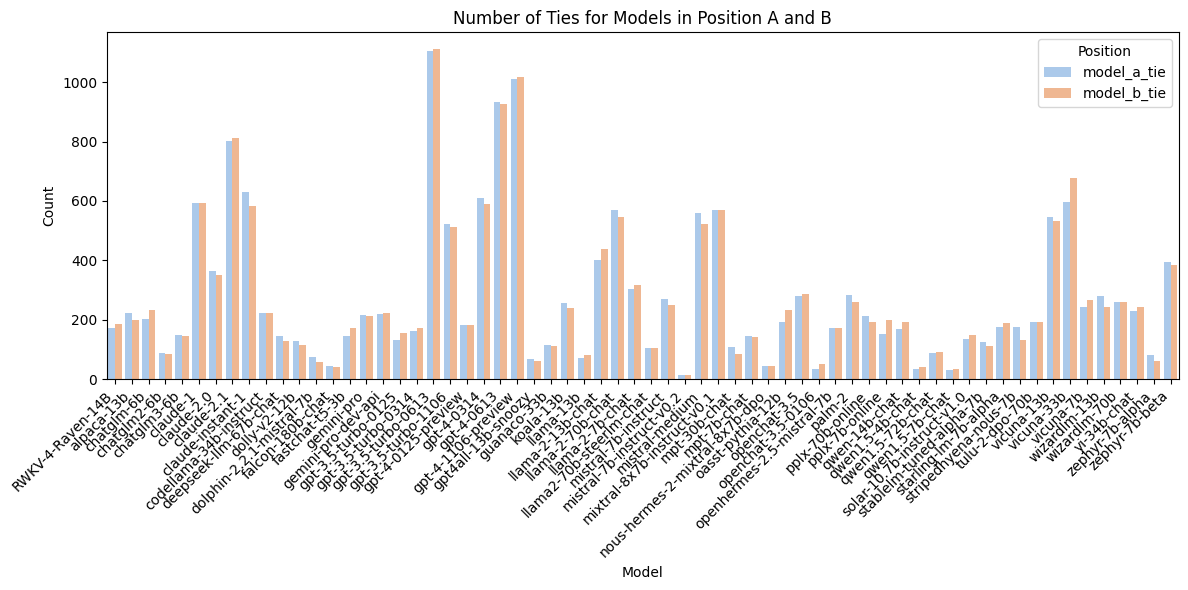

In [23]:
# tie


# count the number of ties for model_a and model_b
model_a_tie = df_train[df_train['winner'] == 'winner_tie'].groupby('model_a').size().reset_index(name='count')
model_b_tie = df_train[df_train['winner'] == 'winner_tie'].groupby('model_b').size().reset_index(name='count')

# rename and merge to a new df
model_a_tie.rename(columns={'model_a': 'model', 'count': 'model_a_tie'}, inplace=True)
model_b_tie.rename(columns={'model_b': 'model', 'count': 'model_b_tie'}, inplace=True)
merged_tie = pd.merge(model_a_tie, model_b_tie, on='model', how='outer').fillna(0)

# Mmlt the dataframe for easier plotting
merged_tie = pd.melt(merged_tie, id_vars=['model'], value_vars=['model_a_tie', 'model_b_tie'], 
                     var_name='Position', value_name='Count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_tie, x='model', y='Count', hue='Position')
plt.title('Number of Ties for Models in Position A and B')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## Length biases

**Assumption** 
- There could be a preference for longer answers.

**Result**
- Analyzing the overall length or word count, it's observed that response A tends to win slightly more often when len(a) - len(b) exceeds 0, while response B tends to prevail when len(a) - len(b) is less than 0.

### overall length

In [24]:
# Calculate length of response_a and response_b
df_train['response_a_length'] = df_train['response_a'].str.len()
df_train['response_b_length'] = df_train['response_b'].str.len()

df_train.head(3)

,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner,response_a_length,response_b_length
0,gpt-4-1106-preview,gpt-4-0613,Is it morally right to try to have a certain p...,The question of whether it is morally right to...,"As an AI, I don't have personal beliefs or opi...",1,0,0,winner_model_a,4532,1200
1,koala-13b,gpt-4-0613,What is the difference between marriage licens...,A marriage license is a legal document that al...,A marriage license and a marriage certificate ...,0,1,0,winner_model_b,3106,3641
2,gpt-3.5-turbo-0613,mistral-medium,explain function calling. how would you call a...,Function calling is the process of invoking or...,Function calling is the process of invoking a ...,0,0,1,winner_tie,917,1831


In [25]:
df_train['length_diff'] = df_train['response_a_length']-df_train['response_b_length']
df_train.head(3)

,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner,response_a_length,response_b_length,length_diff
0,gpt-4-1106-preview,gpt-4-0613,Is it morally right to try to have a certain p...,The question of whether it is morally right to...,"As an AI, I don't have personal beliefs or opi...",1,0,0,winner_model_a,4532,1200,3332
1,koala-13b,gpt-4-0613,What is the difference between marriage licens...,A marriage license is a legal document that al...,A marriage license and a marriage certificate ...,0,1,0,winner_model_b,3106,3641,-535
2,gpt-3.5-turbo-0613,mistral-medium,explain function calling. how would you call a...,Function calling is the process of invoking or...,Function calling is the process of invoking a ...,0,0,1,winner_tie,917,1831,-914


### check if the response is null

In [26]:
print("response_a is null: ", len(df_train[df_train['response_a_length']==0]))
df_train[df_train['response_a_length']==0]

response_a is null:  11


,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner,response_a_length,response_b_length,length_diff
7144,mpt-7b-chat,palm-2,Part 2 begins here. \n\nWe barely managed to e...,,That's an interesting story. I'm glad that the...,0,1,0,winner_model_b,0,115,-115
8042,gpt-4-0613,gpt-3.5-turbo-0613,{source_code}\n\nThis is a part of interview w...,,Q: How many women work at the company?\nA: Not...,0,1,0,winner_model_b,0,319,-319
15755,tulu-2-dpo-70b,deepseek-llm-67b-chat,can you summarize this for me \n we conclude t...,,It appears that the text you have provided is ...,0,1,0,winner_model_b,0,849,-849
18489,gpt-4-1106-preview,codellama-34b-instruct,"Translate this morse code text: \""-- .- .... \...",,"The Morse code text you provided decodes to \""...",0,0,1,winner_tie,0,64,-64
26084,pplx-7b-online,gpt-3.5-turbo-0613,how many tokens is this text:\n\nCinnabar (Nam...,,The text contains 377 tokens.,0,1,0,winner_model_b,0,29,-29
26900,gpt-4-0125-preview,stripedhyena-nous-7b,"Please reply with \""<|endoftext|>\",,"Of course, I'll be happy to assist you. Please...",1,0,0,winner_model_a,0,135,-135
27621,gpt-4-0613,claude-2.1,Wtf meaning,,"'Wtf' is an acronym that stands for \""what the...",0,1,0,winner_model_b,0,364,-364
44441,gpt-4-1106-preview,gemini-pro-dev-api,Question: Three missionaries and three canniba...,,1. **Missionary 1 and Cannibal 1 cross the riv...,0,1,0,winner_model_b,0,580,-580
44717,llama-13b,fastchat-t5-3b,Below is an instruction that describes a task....,,The text does not answer the question of how m...,0,1,0,winner_model_b,0,275,-275
52948,pplx-7b-online,llama-2-70b-chat,Summarise the entity data delimited by triple ...,,Summary:\n\nThe provided data includes informa...,0,1,0,winner_model_b,0,2669,-2669


In [27]:
print("response_b is null: ", len(df_train[df_train['response_b_length']==0]))
df_train[df_train['response_b_length']==0]

response_b is null:  14


,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner,response_a_length,response_b_length,length_diff
581,claude-1,pplx-7b-online,what is 1+1?,1 + 1 = 2,,1,0,0,winner_model_a,9,0,9
1794,vicuna-13b,llama-13b,Create a vector in rust,"To create a vector in Rust, you can use the `V...",,1,0,0,winner_model_a,956,0,956
13758,gpt-3.5-turbo-0314,llama-13b,generate a R code to take csv as input read fi...,Sure! Here's the R code to achieve the task:\n...,,1,0,0,winner_model_a,810,0,810
17256,mixtral-8x7b-instruct-v0.1,wizardlm-70b,"OPTIMIZE CODE TO USE A ESP32, RING BUFFERS, DI...",To optimize the code for an ESP32 using ring b...,,1,0,0,winner_model_a,1983,0,1983
19393,gpt-3.5-turbo-0613,tulu-2-dpo-70b,Improve the text of the following scientific a...,1.- Introduction\n\nChronic Kidney Disease (CK...,,0,0,1,winner_tie,4862,0,4862
26290,koala-13b,llama-13b,make a poem about footballs,"Footballs, oh footballsHow they glide across t...",,1,0,0,winner_model_a,488,0,488
27363,RWKV-4-Raven-14B,mpt-7b-chat,Summarize this conversation between a doctor a...,A patient presents with a history of breathles...,,1,0,0,winner_model_a,390,0,390
33220,deepseek-llm-67b-chat,mixtral-8x7b-instruct-v0.1,"Write 8500 [extremely detailed, overly dialogu...",a yellow Impala and hunt monsters with a coupl...,,1,0,0,winner_model_a,4395,0,4395
38989,chatglm-6b,llama-13b,"Create a message from a tarot card reader, res...",Here's an example of a response to a solicitor...,,0,0,1,winner_tie,1768,0,1768
42234,oasst-pythia-12b,llama-13b,Pull one from scratch:,To create a Linux operating system from scratc...,,0,0,1,winner_tie,1333,0,1333


In [28]:
print("both response are null: ", len(df_train[(df_train['response_a_length']==0) & (df_train['response_b_length']==0)]))
df_train[(df_train['response_a_length']==0) & (df_train['response_b_length']==0)]

both response are null:  0


,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner,response_a_length,response_b_length,length_diff


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

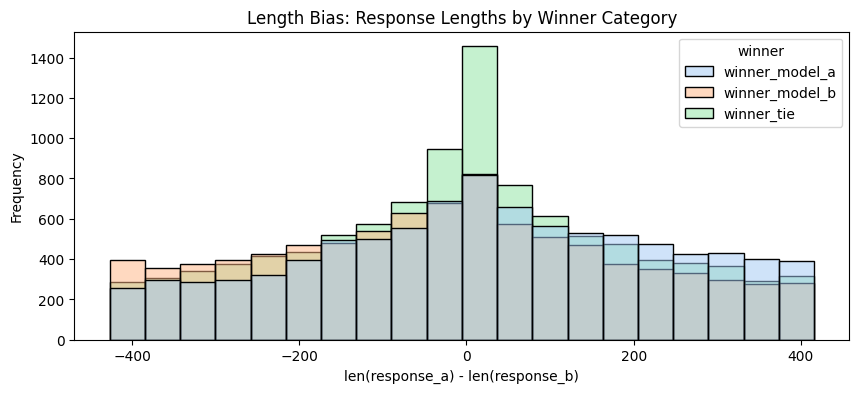

In [29]:
plt.figure(figsize=(10, 4))

data = df_train[(df_train['length_diff'] >= df_train['length_diff'].quantile(0.25)) & \
                (df_train['length_diff'] <= df_train['length_diff'].quantile(0.75))]

sns.histplot(data=data, x='length_diff', hue='winner', bins=20)

plt.title('Length Bias: Response Lengths by Winner Category')
plt.xlabel('len(response_a) - len(response_b)')
plt.ylabel('Frequency')
plt.show()

### word count

In [30]:
df_train['response_a_word_count'] = df_train['response_a'].apply(lambda x: len(x.split()))
df_train['response_b_word_count'] = df_train['response_b'].apply(lambda x: len(x.split()))
df_train.head(3)

,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner,response_a_length,response_b_length,length_diff,response_a_word_count,response_b_word_count
0,gpt-4-1106-preview,gpt-4-0613,Is it morally right to try to have a certain p...,The question of whether it is morally right to...,"As an AI, I don't have personal beliefs or opi...",1,0,0,winner_model_a,4532,1200,3332,657,205
1,koala-13b,gpt-4-0613,What is the difference between marriage licens...,A marriage license is a legal document that al...,A marriage license and a marriage certificate ...,0,1,0,winner_model_b,3106,3641,-535,533,573
2,gpt-3.5-turbo-0613,mistral-medium,explain function calling. how would you call a...,Function calling is the process of invoking or...,Function calling is the process of invoking a ...,0,0,1,winner_tie,917,1831,-914,138,280


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

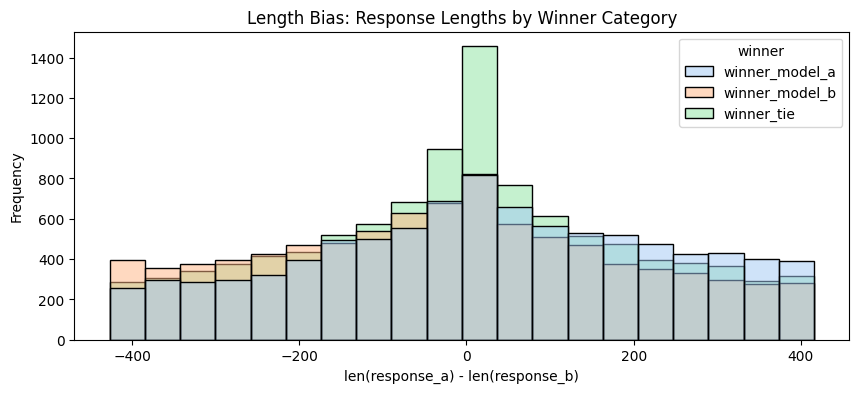

In [31]:
plt.figure(figsize=(10, 4))

data = df_train[(df_train['length_diff'] >= df_train['length_diff'].quantile(0.25)) & \
                (df_train['length_diff'] <= df_train['length_diff'].quantile(0.75))]

sns.histplot(data=data, x='length_diff', hue='winner', bins=20)

plt.title('Length Bias: Response Lengths by Winner Category')
plt.xlabel('len(response_a) - len(response_b)')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

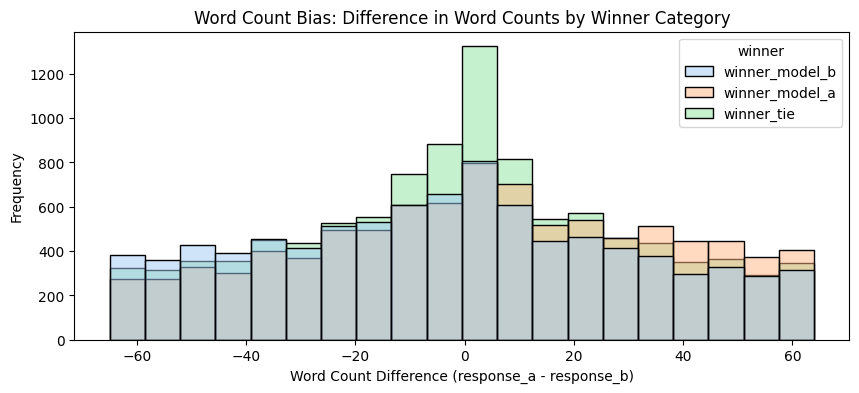

In [32]:
# word count difference
df_train['word_count_diff'] = df_train['response_a_word_count'] - df_train['response_b_word_count']

# Plot the distribution of word count differences
plt.figure(figsize=(10, 4))

data = df_train[(df_train['word_count_diff'] >= df_train['word_count_diff'].quantile(0.25)) & \
                (df_train['word_count_diff'] <= df_train['word_count_diff'].quantile(0.75))]

sns.histplot(data=data, x='word_count_diff', hue='winner', bins=20)

plt.title('Word Count Bias: Difference in Word Counts by Winner Category')
plt.xlabel('Word Count Difference (response_a - response_b)')
plt.ylabel('Frequency')
plt.show()

### prompt check
- People have different preferences for the responses to short prompts like "hey" or "test".

These responses typically fall into two patterns:
1. Directly responding with "Hello!"
2. After saying "Hello", providing a prompt to continue the conversation, like "How can I assist you today?"



**The preference for one over the other varies among individuals**

In [33]:
df_train[df_train['prompt'].str.len()<5]

,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner,response_a_length,response_b_length,length_diff,response_a_word_count,response_b_word_count,word_count_diff
51,gpt-3.5-turbo-0613,gpt-3.5-turbo-1106,test,Hello! How can I assist you today?,Hello! How can I assist you today?,0,0,1,winner_tie,34,34,0,7,7,0
947,gpt-4-0613,gpt-3.5-turbo-1106,hey,Hello! How can I assist you today?,Hello! How can I help you today?,1,0,0,winner_model_a,34,32,2,7,7,0
1219,claude-2.0,palm-2,Hat,Here are a few key things to know about hats:\...,"Hat A hat is a head covering worn for warmth,...",1,0,0,winner_model_a,1576,77,1499,262,14,248
2134,gpt-4-0314,gpt-4-0613,sadf,It seems like you've entered a random combinat...,It seems like you've typed something incorrect...,0,0,1,winner_tie,161,103,58,29,16,13
2473,llama-2-7b-chat,claude-2.1,Hey,Hey there! \ud83d\ude0a How are you doing today?,Hello!,1,0,0,winner_model_a,48,6,42,8,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57103,claude-2.0,claude-instant-1,hey,Hello!,Hello!,0,0,1,winner_tie,6,6,0,1,1,0
57316,gpt-3.5-turbo-0613,pplx-70b-online,Rat,Rats are small rodents that are found all over...,"Rats are various medium-sized, long-tailed rod...",0,1,0,winner_model_b,212,1372,-1160,38,213,-175
57327,zephyr-7b-beta,gpt-3.5-turbo-0613,hey,Hello! How may I assist you today? Please prov...,Hello! How can I assist you today?,0,0,1,winner_tie,119,34,85,24,7,17
57449,gpt-3.5-turbo-1106,starling-lm-7b-alpha,Hey,Hello! How can I assist you today?,It's great to see you again! I'm here to help ...,1,0,0,winner_model_a,34,846,-812,7,143,-136


In [34]:
df_train[(df_train['prompt'].str.len()<5) & (df_train['winner_tie']!=1)]

,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner,response_a_length,response_b_length,length_diff,response_a_word_count,response_b_word_count,word_count_diff
947,gpt-4-0613,gpt-3.5-turbo-1106,hey,Hello! How can I assist you today?,Hello! How can I help you today?,1,0,0,winner_model_a,34,32,2,7,7,0
1219,claude-2.0,palm-2,Hat,Here are a few key things to know about hats:\...,"Hat A hat is a head covering worn for warmth,...",1,0,0,winner_model_a,1576,77,1499,262,14,248
2473,llama-2-7b-chat,claude-2.1,Hey,Hey there! \ud83d\ude0a How are you doing today?,Hello!,1,0,0,winner_model_a,48,6,42,8,1,7
2654,gpt-4-1106-preview,gemini-pro-dev-api,lol,Hello! It seems like you're in a good mood. \u...,lol,1,0,0,winner_model_a,134,3,131,25,1,24
2722,vicuna-33b,claude-2.1,hey,Hello! How can I help you today? If you have a...,Hello!,1,0,0,winner_model_a,109,6,103,22,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56100,mixtral-8x7b-instruct-v0.1,gpt-4-1106-preview,Hey,Hello! How can I help you today? If you have a...,Hello! How can I assist you today?,1,0,0,winner_model_a,141,34,107,27,7,20
56520,vicuna-13b,wizardlm-70b,hey,Hey there! How's it going?,Hello! How can I help you today? If you have a...,1,0,0,winner_model_a,26,96,-70,5,19,-14
57316,gpt-3.5-turbo-0613,pplx-70b-online,Rat,Rats are small rodents that are found all over...,"Rats are various medium-sized, long-tailed rod...",0,1,0,winner_model_b,212,1372,-1160,38,213,-175
57449,gpt-3.5-turbo-1106,starling-lm-7b-alpha,Hey,Hello! How can I assist you today?,It's great to see you again! I'm here to help ...,1,0,0,winner_model_a,34,846,-812,7,143,-136


In [35]:
df_train[(df_train['prompt'].str.len()<5) & (df_train['winner_tie']!=1) & (df_train['response_a']==df_train['response_b'])]

,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner,response_a_length,response_b_length,length_diff,response_a_word_count,response_b_word_count,word_count_diff
50428,llama-2-13b-chat,codellama-34b-instruct,hey!,Hey there! How's it going?,Hey there! How's it going?,1,0,0,winner_model_a,26,26,0,5,5,0


In [36]:
# hey
df_train[(df_train['prompt'].str.len()<5) & (df_train['winner_tie']!=1) \
         & (df_train['prompt'].str.lower()=='hey')]

,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner,response_a_length,response_b_length,length_diff,response_a_word_count,response_b_word_count,word_count_diff
947,gpt-4-0613,gpt-3.5-turbo-1106,hey,Hello! How can I assist you today?,Hello! How can I help you today?,1,0,0,winner_model_a,34,32,2,7,7,0
2473,llama-2-7b-chat,claude-2.1,Hey,Hey there! \ud83d\ude0a How are you doing today?,Hello!,1,0,0,winner_model_a,48,6,42,8,1,7
2722,vicuna-33b,claude-2.1,hey,Hello! How can I help you today? If you have a...,Hello!,1,0,0,winner_model_a,109,6,103,22,1,21
4295,claude-2.0,qwen-14b-chat,Hey,Hello!,Hello! How can I assist you today?,0,1,0,winner_model_b,6,34,-28,1,7,-6
5101,wizardlm-70b,palm-2,Hey,Hello! How can I help you today? If you have a...,"Hey there, how can I help you?",1,0,0,winner_model_a,96,30,66,19,7,12
6104,claude-2.1,yi-34b-chat,hey,Hello!,Hello! How can I assist you today? If you have...,0,1,0,winner_model_b,6,119,-113,1,23,-22
13785,mixtral-8x7b-instruct-v0.1,gpt-4-0314,hey,Hello! How can I help you today? If you have a...,Hello! How can I help you today?,0,1,0,winner_model_b,304,32,272,56,7,49
14969,qwen-14b-chat,llama-2-70b-chat,hey,Hello! How can I help you today? Is there some...,Hey there! How's it going?,1,0,0,winner_model_a,228,26,202,44,5,39
17494,mistral-medium,vicuna-33b,hey,Hello! How can I help you today? Is there some...,Hello! How can I help you today? If you have a...,0,1,0,winner_model_b,519,118,401,101,23,78
22052,gpt-3.5-turbo-0613,yi-34b-chat,hey,Hello! How can I assist you today?,Hey! How can I assist you today? If you have a...,0,1,0,winner_model_b,34,105,-71,7,21,-14


In [37]:
# test
df_train[(df_train['prompt'].str.len()<5) & (df_train['winner_tie']!=1) \
         & (df_train['prompt'].str.lower()=='test')]

,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner,response_a_length,response_b_length,length_diff,response_a_word_count,response_b_word_count,word_count_diff
4164,gpt-4-0314,gpt-4-0613,Test,Hello! How can I assist you today? If you have...,Hello! How can I assist you today?,0,1,0,winner_model_b,92,34,58,19,7,12
4594,wizardlm-13b,gpt-3.5-turbo-0613,Test,Hello! How can I help you today? Do you have a...,Hello! How can I assist you today?,1,0,0,winner_model_a,116,34,82,22,7,15
4899,gpt-4-0613,gpt-4-1106-preview,Test,Hello! How can I assist you today?,Hello! It seems like you're testing the chat. ...,0,1,0,winner_model_b,34,158,-124,7,30,-23
5275,gpt-3.5-turbo-1106,pplx-70b-online,test,Hello! How can I assist you today?,A test is a means of evaluating or assessing s...,1,0,0,winner_model_a,34,996,-962,7,154,-147
6392,gpt-4-0314,claude-2.1,test,Hello! How can I assist you today? If you have...,Hello!,1,0,0,winner_model_a,96,6,90,20,1,19
7098,vicuna-13b,chatglm-6b,test,"I'm sorry, I'm not sure what you're asking. Ca...","I'm sorry, I'm not sure what you mean by \""tes...",1,0,0,winner_model_a,153,131,22,27,24,3
9195,llama-2-7b-chat,mistral-7b-instruct,test,"Sure, here are some examples of different type...",Hello! How can I help you today?,0,1,0,winner_model_b,1397,32,1365,207,7,200
10358,zephyr-7b-alpha,llama-2-7b-chat,Test,I don't have any physical or functional capabi...,Hello! How can I help you today?,0,1,0,winner_model_b,497,32,465,81,7,74
11913,oasst-pythia-12b,vicuna-13b,test,Hello there! How can I help you today?,Hello! Is there anything specific you would li...,0,1,0,winner_model_b,38,120,-82,8,23,-15
14957,mpt-30b-chat,alpaca-13b,test,Hello! How can I help you today? Do you have a...,This is a test.,0,1,0,winner_model_b,104,15,89,20,4,16
